# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Introducción:

El proyecto consiste en realizar un análisis preliminar de tarifas para Megaline, un operador de telecomunicaciones que ofrece dos tarifas de prepago: Surf y Ultimate. El objetivo es determinar cuál de las dos tarifas genera más ingresos para la empresa. Para este análisis, se cuenta con datos de 500 clientes de Megaline que incluyen información sobre los clientes, el tipo de tarifa que utilizan, la cantidad de llamadas realizadas y los mensajes de texto enviados en 2018.

El análisis tiene como propósito:

Comparar los ingresos generados por cada plan.

Estudiar el comportamiento de los clientes con respecto al uso de llamadas y mensajes, en función de la tarifa que elijan.

Proporcionar información sobre cuál tarifa debe priorizarse para ajustar el presupuesto de publicidad de la empresa.

## Inicialización

In [430]:
# Cargar todas las librerías
from scipy import stats as st
from math import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [431]:
# Carga los archivos de datos en diferentes DataFrames
usuarios = pd.read_csv('/datasets/megaline_users.csv')
llamadas = pd.read_csv('/datasets/megaline_calls.csv')
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
tarifas = pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos

## Tarifas

In [432]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
tarifas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [433]:
# Imprime una muestra de los datos para las tarifas
tarifas.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Este archivo contiene la información básica de cada plan tarifario disponible. Incluye detalles como la cantidad de mensajes, minutos de llamadas y megabytes de datos móviles que ofrece cada plan, junto con su precio correspondiente. También se especifican los costos adicionales que se aplican cuando un usuario supera los límites incluidos en su paquete.

⚠️ Importante:
La columna mg_per_month representa el consumo de datos en megabytes, mientras que user_per_gb está expresado en gigabytes, por lo que se recomienda unificar las unidades durante el análisis para evitar errores de interpretación.


La mayoría de los datos están expresados en valores numéricos (enteros y flotantes), lo cual facilita su análisis y permite formular hipótesis personalizadas sobre el comportamiento y necesidades de cada cliente en relación con el plan que utiliza.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [434]:
tarifas["mb_per_month_included"] = tarifas["mb_per_month_included"].astype(float)
tarifas.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360.0,500,20,10,0.03,0.03,surf
1,1000,30720.0,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

In [435]:
tarifas["mb_per_month_included"] = tarifas["mb_per_month_included"]/1024
tarifas.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [436]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [437]:
# Imprime una muestra de datos para usuarios
usuarios.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
208,1208,Enrique,Ramirez,44,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-17,surf,NaN
169,1169,Hai,Bean,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-06,surf,NaN
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaN
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaN
225,1225,Margarito,Barker,41,"Columbia, SC MSA",2018-06-07,surf,NaN


Este archivo contiene la información general de los usuarios de Megaline, incluyendo datos clave como el identificador del cliente, su plan tarifario, ciudad de residencia y la fecha de inicio del servicio.

📅 Formato de fecha:
La columna de fecha (first_date) debe ser transformada al formato día/mes/año (DD/MM/AAAA) para una mejor interpretación y consistencia con el formato regional.

🗑️ Columna churn_date:
Esta columna indica la fecha en la que un usuario dejó de utilizar el servicio. Sin embargo, la mayoría de los registros presentan valores ausentes (NaN), lo que significa que esos usuarios seguían activos al momento de extraer los datos. Solo 34 usuarios tienen una fecha registrada de cancelación, por lo que se considera irrelevante para el análisis general y puede eliminarse del conjunto de datos.

### Corregir los datos

In [438]:
# Convertir la columna 'reg_date' de string a numérico utilizando .loc para acceso adecuado
# ya que me lanzaba un warning que debía usarlo
usuarios.loc[:, 'reg_date'] = pd.to_datetime(usuarios['reg_date'], errors='coerce')
# Cambiar el formato de la fecha a dd-mm-aa
usuarios.loc[:, 'reg_date'] = usuarios['reg_date'].dt.strftime('%d-%m-%y')
# imprimir
usuarios.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-18,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-18,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-18,surf,NaN


### Enriquecer los datos

Como se puede observar, en el archivo usuarios tenemos 466 valores ausentes en la columna correspondiente al churn_date (fecha en la que el usuario dejó de usar el servicio). Dado que los valores ausentes representan solo un pequeño número de usuarios que se han dado de baja, hemos decidido eliminar la columna para evitar que afecte el análisis general. Sin embargo, para no perder completamente esta información, hemos extraído los registros con valores ausentes y los hemos guardado en un nuevo DataFrame, de manera que podamos recuperarlos si es necesario en el futuro.

In [439]:
print(usuarios.isnull().sum())
usuarios_mod = usuarios.drop(labels=['churn_date'], axis='columns')
usuarios_mod.head(5)

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-18,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-18,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-18,surf


In [440]:
print(usuarios.duplicated().sum())

0


## Llamadas

In [441]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [442]:
# Imprime una muestra de datos para las llamadas
llamadas.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El archivo megaline_calls.csv contiene información sobre las llamadas realizadas por los usuarios. La única modificación necesaria es la columna call_date, que debe cambiar su formato de fecha de YYYY-MM-DD a dd/mm/aa para ajustarse a los requisitos del proyecto. El resto de las columnas no requieren cambios.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [443]:
#Convertir call_date en dtype datetime64
llamadas.loc[:, 'call_date'] = pd.to_datetime(llamadas['call_date'], errors='coerce')
# Redondear hacia arriba y convertir 'duration' a enteros
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [444]:
#ordenarlos por message_date para mejorar su visibilidad
llamadas = llamadas.sort_values(by='call_date')
llamadas.head()

,id,user_id,call_date,duration
54532,1196_420,1196,2018-01-15,0.00
20792,1077_759,1077,2018-01-15,10.69
20111,1077_78,1077,2018-01-15,9.15
54207,1196_84,1196,2018-01-15,10.91
20764,1077_731,1077,2018-01-15,0.00


## Mensajes

In [445]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [446]:
# Imprime una muestra de datos para los mensajes
mensajes.sample(5)

,id,user_id,message_date
45445,1308_86,1308,2018-12-25
36824,1246_128,1246,2018-02-19
5648,1054_12,1054,2018-09-03
51680,1335_270,1335,2018-07-16
4122,1043_145,1043,2018-08-13


El archivo messages contiene información sobre los mensajes enviados por los usuarios. Al igual que el archivo de llamadas, todos los datos están completos en cada categoría y no hay datos ausentes. La única modificación necesaria es el formato de la fecha, que debe ser convertido de su formato original al formato dd/mm/aa para cumplir con los requisitos del proyecto.

### Corregir los datos

De manera similar, el archivo de mensajes no está organizado por user_id o un identificador único. Es importante ordenar este archivo por user_id o id para asegurar que los mensajes estén correctamente asignados a cada usuario y facilitar su análisis.

In [548]:
#Convertir message_date en dtype datetime64
mensajes.loc[:, 'message_date'] = pd.to_datetime(mensajes['message_date'], errors='coerce')
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 10897 to 14069
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.9+ MB


### Enriquecer los datos

De manera similar, el archivo de mensajes no está organizado por user_id o un identificador único. Es importante ordenar este archivo por user_id o id para asegurar que los mensajes estén correctamente asignados a cada usuario y facilitar su análisis.

In [448]:
mensajes = mensajes.sort_values(by='message_date')
mensajes.head()

,id,user_id,message_date
10897,1077_168,1077,2018-01-15
10731,1077_2,1077,2018-01-15
10944,1077_215,1077,2018-01-16
11144,1077_415,1077,2018-01-16
31693,1196_177,1196,2018-01-16


## Internet

In [449]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [450]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


No se encuentran valores ausentes en el DataFrame. Lo único que requiere modificación es la columna session_date, la cual debe ser convertida a formato datetime64 para asegurar que los datos sean manipulados correctamente como fechas.

### Corregir los datos

In [451]:
#Convertir call_date en dtype datetime64
internet.loc[:, 'session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

En el archivo internet, hemos ordenado los datos por la columna de fecha para asegurar que la información esté organizada cronológicamente. Esto facilita el análisis de la actividad de los usuarios a lo largo del tiempo y permite una mejor comprensión de las tendencias y patrones en el uso de los servicios de internet.

In [452]:
#Ordenar los datos por medio de la session_date
internet = internet.sort_values(by='session_date')
internet.head()

,id,user_id,session_date,mb_used
17220,1077_340,1077,2018-01-15,287.25
17098,1077_218,1077,2018-01-15,906.65
17135,1077_255,1077,2018-01-16,922.71
17051,1077_171,1077,2018-01-16,853.38
44475,1196_488,1196,2018-01-17,0.00


## Estudiar las condiciones de las tarifas

In [453]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
tarifas.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [456]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# confirmar de que 'call_date' está en formato de fecha
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], errors='coerce')
# Extraer el mes de la fecha
llamadas['month'] = llamadas['call_date'].dt.month
# Agrupar por usuario y mes, y calcular la duración total de las llamadas
llamadas_x_mes = llamadas.groupby(by=['user_id','month'])['call_date']
#Contar cuanto es por mes y agregamos el nombre de la columna de la suma
llamadas_mes_cuenta = llamadas_x_mes.count().reset_index()
#agrego el nombre correcto
llamadas_mes_cuenta.rename(columns={'call_date': 'month_calls'}, inplace=True)
# Verificar el resultado
llamadas_mes_cuenta.head(5)

,user_id,month,month_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [457]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# confirmar de que 'call_date' está en formato de fecha
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], errors='coerce')
# Extraer el mes de la fecha
llamadas['month'] = llamadas['call_date'].dt.month
# Agrupar por usuario y mes, y calcular la duración total de las llamadas
minutos_mes = llamadas.groupby(by=['user_id','month'])['duration']
#Contar cuanto es por mes y agregamos el nombre de la columna de la suma
minutos_x_mes = minutos_mes.sum().reset_index()
#agrego el nombre correcto
minutos_x_mes.rename(columns={'duration': 'month_duration'}, inplace=True)
# Verificar el resultado
minutos_x_mes.head(5)

,user_id,month,month_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [459]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# confirmar de que 'message_date' está en formato de fecha
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'], errors='coerce')
# Extraer el mes de la fecha
mensajes['month'] = mensajes['message_date'].dt.month
# Agrupar por usuario y mes, 
mensajes_x_mes = mensajes.groupby(by=['user_id','month'])['message_date']
#Contar cuantos mensajes se enviaron por mes
mensajes_mes_cuenta = mensajes_x_mes.count().reset_index()
#agrego el nombre correcto
mensajes_mes_cuenta.rename(columns={'message_date': 'month_messages'}, inplace=True)
# Verificar el resultado
mensajes_mes_cuenta.head(5)


,user_id,month,month_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [462]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# confirmar de que 'session_date' está en formato de fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
# Extraer por meses
internet['month'] = internet['session_date'].dt.month
# Agrupar por usuario y mes, 
volumen_x_mes = internet.groupby(by=['user_id','month'])['mb_used']
#Contar cuantos mensajes se enviaron por mes
volumen_mes_total = volumen_x_mes.sum().reset_index()
#agrego el nombre correcto
volumen_mes_total.rename(columns={'mb_used': 'month_trafic'}, inplace=True)
# Verificar el resultado
volumen_mes_total.head(5)


,user_id,month,month_trafic
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [463]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#paso 1 fusionando las llamadas y minutos, para formar un DF
llam_y_min = llamadas_mes_cuenta.merge(minutos_x_mes, on=['user_id', 'month'], how='outer')
llam_y_min.head(5)

,user_id,month,month_calls,month_duration
0,1000,12,16,116.83
1,1001,8,27,171.14
2,1001,9,49,297.69
3,1001,10,65,374.11
4,1001,11,64,404.59


In [464]:
#paso 2 fusionando mensajes e internet para tener un nuevo DF
wifi_y_men = mensajes_mes_cuenta.merge(volumen_mes_total, on=['user_id', 'month'], how='outer')
wifi_y_men.head(5)

,user_id,month,month_messages,month_trafic
0,1000,12,11.0,1901.47
1,1001,8,30.0,6919.15
2,1001,9,44.0,13314.82
3,1001,10,53.0,22330.49
4,1001,11,36.0,18504.30


In [465]:
#Paso 3 fusionando Paso 1 y Paso 2
fusion_dfs = llam_y_min.merge(wifi_y_men, on=['user_id', 'month'], how='outer')
fusion_dfs.head(5)

,user_id,month,month_calls,month_duration,month_messages,month_trafic
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30


In [546]:
# Añade la información de la tarifa
#Paso 1 sacar el plan de usuarios con el user_id
usuarios_plan = usuarios.loc[:,['user_id','plan', 'city']]
#paso 2: agregar el plan a DF fusion_dfs 
fusion_plan = fusion_dfs.merge(usuarios_plan, on='user_id', how='outer')
fusion_plan.head(5)
#Rellamar la columna de plan con plan_name para que pueda unificar la información
fusion_plan.rename(columns={'plan': 'plan_name'}, inplace=True)
# ahora debemos agreguar la información de las tarifas dependiendo del plan.
fusion_tarifas = fusion_plan.merge(tarifas, on='plan_name', how='outer')
fusion_tarifas.head(5)

,user_id,month,month_calls,month_duration,month_messages,month_trafic,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01
1,1006,11.0,2.0,9.32,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01
2,1006,12.0,9.0,54.79,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01
3,1008,10.0,71.0,450.21,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01
4,1008,11.0,63.0,422.81,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01


In [482]:
fusion_tarifas.fillna(0, inplace=True)

In [483]:
# Calcula el ingreso mensual para cada usuario
# Hacer la resta para conocer si hay minutos en exceso
fusion_tarifas['exceso_min'] = fusion_tarifas['minutes_included'] - fusion_tarifas['month_duration']
#Hacer una condición por el tipo de plan y fusion_tarifas['exceso_min'] es menor a fusion_tarifas['minutes_included']
if [fusion_tarifas['plan_name'] == 'surf'] and [fusion_tarifas['exceso_min'] < fusion_tarifas['minutes_included']]:
    fusion_tarifas['excess_costo_min'] = fusion_tarifas['exceso_min'] * 0.03  # debe multiplicarlo con 3 centavos por minuto
elif fusion_tarifas['plan_name'] == 'ultimate' and [fusion_tarifas['exceso_minutos'] < fusion_tarifas['minutes_included']]:
    fusion_tarifas['excess_costo_min'] = fusion_tarifas['exceso_min'] * 0.01  # 1 centavo por minuto
else:
    fusion_tarifas['excess_costo_min'] = 0
#sacar las columnas que queremos conocer y lo imprimimos
costo_usd_min = fusion_tarifas.loc[:, ['user_id', 'month', 'exceso_min', 'excess_costo_min', 'plan_name']]
costo_usd_min.head(5)

,user_id,month,exceso_min,excess_costo_min,plan_name
0,1000,12.0,2883.17,86.4951,ultimate
1,1006,11.0,2990.68,89.7204,ultimate
2,1006,12.0,2945.21,88.3563,ultimate
3,1008,10.0,2549.79,76.4937,ultimate
4,1008,11.0,2577.19,77.3157,ultimate


In [484]:
# Exceso de mensajes por usuario. Paso 1 Hacer la resta para conocer si hay minutos en exceso
fusion_tarifas['exceso_msj'] = fusion_tarifas['messages_included'] - fusion_tarifas['month_messages']
#Hacer una condición por el tipo de plan y fusion_tarifas['exceso_msj'] es menor a fusion_tarifas['messages_included']
if [fusion_tarifas['plan_name'] == 'surf'] and [fusion_tarifas['exceso_msj'] < fusion_tarifas['messages_included']]:
    fusion_tarifas['excess_costo_msj'] = fusion_tarifas['exceso_msj'] * 0.03  # debe multiplicarlo con 3 centavos por mensaje
elif fusion_tarifas['plan_name'] == 'ultimate' and [fusion_tarifas['exceso_minutos'] < fusion_tarifas['messages_included']]:
    fusion_tarifas['excess_costo_msj'] = fusion_tarifas['exceso_msj'] * 0.01  # 1 centavo por mensaje extra
else:
    fusion_tarifas['excess_costo'] = 0
#sacar las columnas que queremos conocer y lo imprimimos
costo_usd_msj = fusion_tarifas.loc[:, ['user_id', 'month', 'exceso_msj', 'excess_costo_msj']]
costo_usd_msj.head(5)

,user_id,month,exceso_msj,excess_costo_msj
0,1000,12.0,989.0,29.67
1,1006,11.0,985.0,29.55
2,1006,12.0,861.0,25.83
3,1008,10.0,979.0,29.37
4,1008,11.0,963.0,28.89


In [485]:
# Exceso de internet por usuario
fusion_tarifas['exceso_wifi'] = (fusion_tarifas['mb_per_month_included'] - (fusion_tarifas['month_trafic'] / 1024))
#Hacer una condición por el tipo de plan y fusion_tarifas['exceso_msj'] es menor a fusion_tarifas['messages_included']
if [fusion_tarifas['plan_name'] == 'surf'] and [fusion_tarifas['exceso_wifi'] < fusion_tarifas['mb_per_month_included']]:
    fusion_tarifas['excess_costo_wifi'] = fusion_tarifas['exceso_wifi'] * 10  # debe multiplicarlo con 3 centavos por mensaje
elif fusion_tarifas['plan_name'] == 'ultimate' and [fusion_tarifas['exceso_wifi'] < fusion_tarifas['mb_per_month_included']]:
    fusion_tarifas['excess_costo_wifi'] = fusion_tarifas['exceso_wifi'] * 7  # 1 centavo por mensaje extra
else:
    fusion_tarifas['excess_costo_wifi'] = 0
#sacar las columnas que queremos conocer y lo imprimimos
costo_usd_wifi = fusion_tarifas.loc[:, ['user_id', 'month', 'exceso_wifi', 'excess_costo_wifi']]
costo_usd_wifi.head(5)

,user_id,month,exceso_wifi,excess_costo_wifi
0,1000,12.0,28.143096,281.430957
1,1006,11.0,27.980107,279.801074
2,1006,12.0,-1.366035,-13.660352
3,1008,10.0,13.293955,132.939551
4,1008,11.0,6.878203,68.782031


In [526]:
#Sacando el total por usuario de cada exceso en USD
fusion_tarifas['exceso_usd'] = fusion_tarifas['excess_costo_wifi'] + fusion_tarifas['excess_costo_msj'] + fusion_tarifas['excess_costo_min'] 
fusion_tarifas['ingresos_mensuales'] = fusion_tarifas['exceso_usd'] + fusion_tarifas['usd_monthly_pay']
fusion_tarifas['ingresos_mensuales'] = fusion_tarifas['ingresos_mensuales'].apply(lambda x: max(0, x))
ingresos_mensuales= fusion_tarifas.loc[:, ['user_id', 'month', 'exceso_usd', 'plan_name', 'ingresos_mensuales', 'city']]
ingresos_mensuales.sample(5)

,user_id,month,exceso_usd,plan_name,ingresos_mensuales,city
848,1049,10.0,97.084861,surf,117.084861,"New York-Newark-Jersey City, NY-NJ-PA MSA"
493,1380,10.0,213.272660,ultimate,283.272660,"San Jose-Sunnyvale-Santa Clara, CA MSA"
1365,1201,8.0,-198.244823,surf,0.000000,"Bridgeport-Stamford-Norwalk, CT MSA"
1960,1381,10.0,-100.580105,surf,0.000000,"Austin-Round Rock-Georgetown, TX MSA"
1317,1181,12.0,-20.156811,surf,0.000000,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [527]:
#Aunque en los DF originales no habia ausentes, al momento de hacer los cálculos, 
# algunas filas no tenian información, así que eliminarmos los asusentes para que no afecte el nuevo DF.
ingresos_mensuales[['month','exceso_usd', 'ingresos_mensuales']].fillna(0)
ingresos_mensuales.sample(5)

,user_id,month,exceso_usd,plan_name,ingresos_mensuales,city
1265,1171,4.0,-48.402139,surf,0.00000,"Boston-Cambridge-Newton, MA-NH MSA"
1192,1147,7.0,-215.297481,surf,0.00000,"Urban Honolulu, HI MSA"
184,1128,9.0,211.126480,ultimate,281.12648,"Knoxville, TN MSA"
1268,1171,7.0,-40.842872,surf,0.00000,"Boston-Cambridge-Newton, MA-NH MSA"
506,1384,6.0,263.513830,ultimate,333.51383,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA"


## Estudia el comportamiento de usuario

### Llamadas

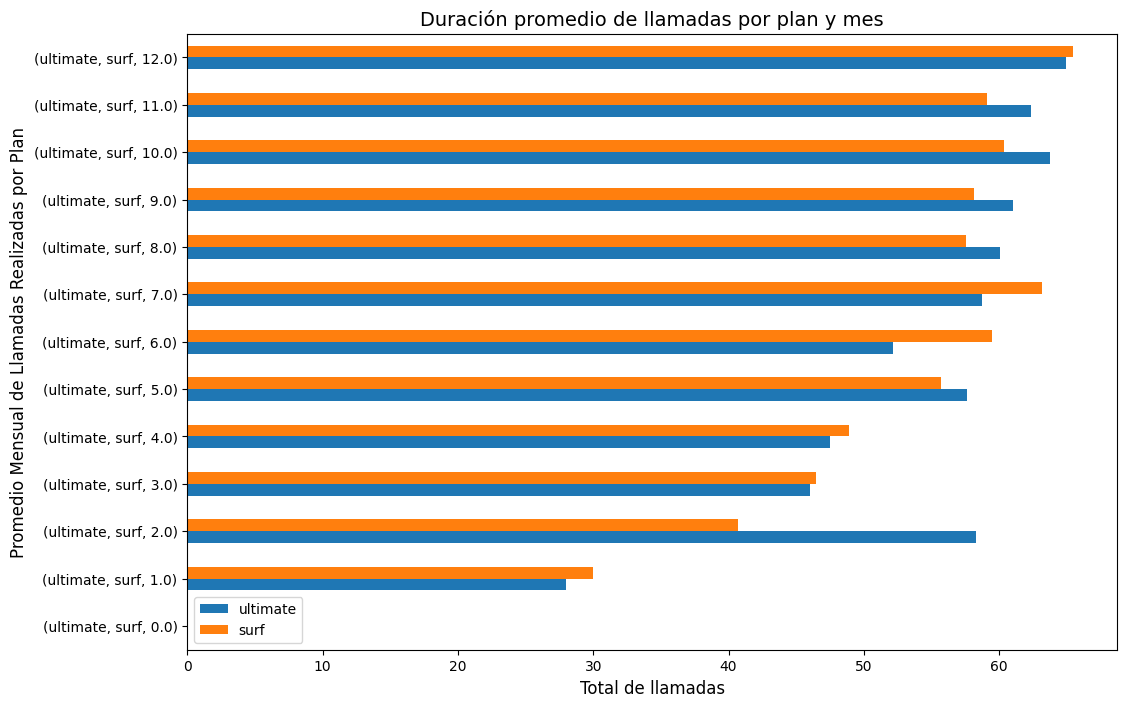

In [528]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Paso 1 agrupar por plan_name
ultimate_llamadas = fusion_tarifas.query("plan_name == 'ultimate'")[['month', 'month_calls', 'plan_name']]
surf_llamadas = fusion_tarifas.query("plan_name == 'surf'")[['month', 'month_calls', 'plan_name']]
#Paso 2 unirlas por medio de month
grupo_calls_meses = ultimate_llamadas.merge(surf_llamadas, on='month')
#Paso 3 Sacar el promedio de grupo_planes_meses
avg_llamadas = grupo_calls_meses.groupby(by=['plan_name_x', 'plan_name_y', 'month'])['month_calls_x', 'month_calls_y'].mean()
#Paso 5 graficar
avg_llamadas.plot(kind='barh', figsize=(12, 8))
plt.title('Duración promedio de llamadas por plan y mes', fontsize=14)
plt.xlabel('Total de llamadas', fontsize=12)
plt.ylabel('Promedio Mensual de Llamadas Realizadas por Plan', fontsize=12)
plt.legend(['ultimate', 'surf'])
plt.show() 

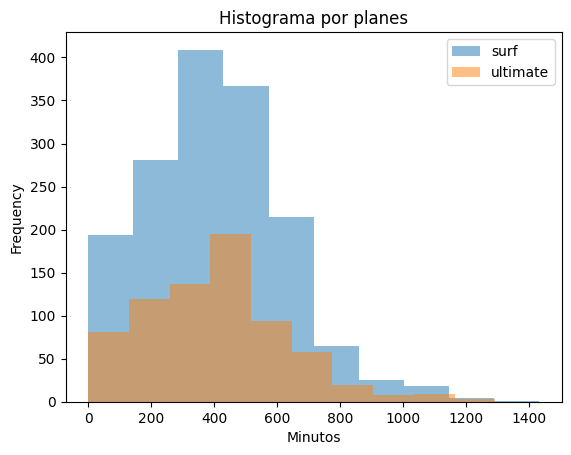

In [529]:
fusion_tarifas.query("plan_name == 'surf'")['month_duration'].plot(kind='hist', alpha=0.5, label='surf')
fusion_tarifas.query("plan_name == 'ultimate'")['month_duration'].plot(kind='hist', alpha=0.5, label='ultimate')
plt.legend()
plt.xlabel('Minutos')
plt.title('Histograma por planes')
plt.show()

In [530]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_varianza_por_plan = fusion_tarifas.groupby('plan_name')['month_duration'].agg(['mean', 'var'])
print(media_varianza_por_plan)

                 mean           var
plan_name                          
surf       403.224345  49568.849927
ultimate   403.948923  52263.047679


<AxesSubplot:xlabel='plan_name', ylabel='month_duration'>

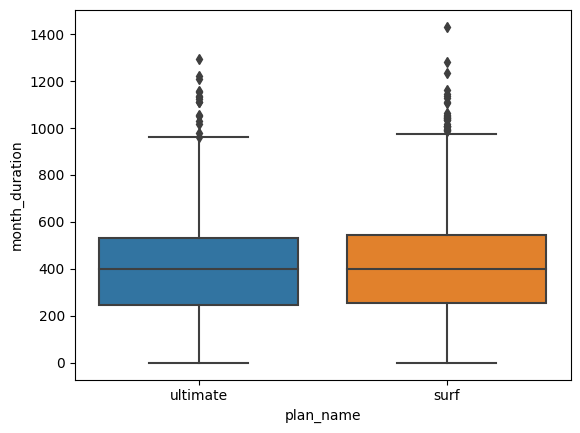

In [531]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=fusion_tarifas, x='plan_name', y='month_duration')

Los usuarios de surf y ultimate tienen una duración mensual de llamadas muy parecida. Sin embargo, los usuarios de surf tienden a hacer un poco más de minutos en promedio.

Los usuarios de ultimate tienen más variedad en la duración de sus llamadas (algunos llaman mucho, otros poco). En cambio, los usuarios de surf tienen una duración de llamadas más uniforme.

¿Varía el comportamiento según el plan?
Sí, el comportamiento de los usuarios cambia un poco según el plan:

Los usuarios de surf tienden a hacer llamadas un poco más largas en promedio. Pero, los usuarios de ultimate tienen más variabilidad en la duración de sus llamadas, mientras que en surf las duraciones de llamadas son más similares entre los usuarios.

### Mensajes

                mean          var
plan_name                        
surf       31.041165  1126.118076
ultimate   37.343923  1209.827612


<AxesSubplot:xlabel='plan_name', ylabel='month_messages'>

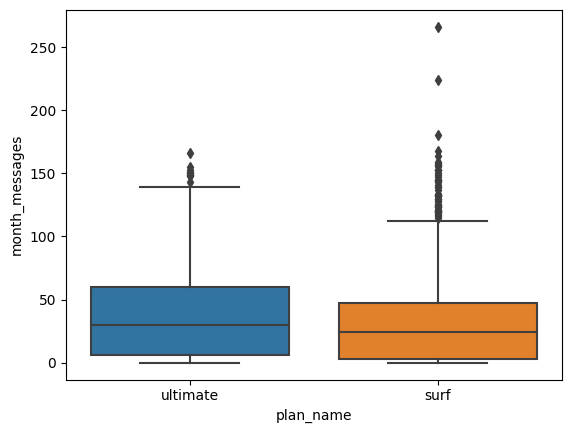

In [532]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_x_planes = fusion_tarifas.groupby('plan_name')['month_messages'].agg(['mean', 'var'])
print(mensajes_x_planes)
sns.boxplot(data=fusion_tarifas, x='plan_name', y='month_messages')

In [533]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
wifi_x_planes = fusion_tarifas.groupby('plan_name')['month_trafic'].agg(['mean', 'var'])
print(wifi_x_planes)

                   mean           var
plan_name                            
surf       16495.364110  6.501076e+07
ultimate   17119.590856  6.294168e+07


Basandonos en el promedio, los usuarios del plan ultimate envían más mensajes en promedio que los del plan surf. Esto indica que los usuarios de ultimate tienden a estar más activos enviando mensajes cada mes.

La variabilidad (o dispersión) en el número de mensajes enviados es similar en ambos planes. Esto significa que no hay mucha diferencia en cómo los usuarios de surf y ultimate distribuyen la cantidad de mensajes enviados. En otras palabras, ambos planes tienen un comportamiento bastante consistente.

¿Varía el comportamiento según el plan?
Sí, el comportamiento de los usuarios cambia un poco según el plan:

Los usuarios de ultimate tienden a enviar más mensajes que los de surf.

Pero, en general, la manera en que los usuarios de ambos planes envían mensajes es bastante similar, ya que la dispersión (o variabilidad) de los mensajes es casi igual en ambos planes.

### Internet

<AxesSubplot:xlabel='plan_name', ylabel='month_trafic'>

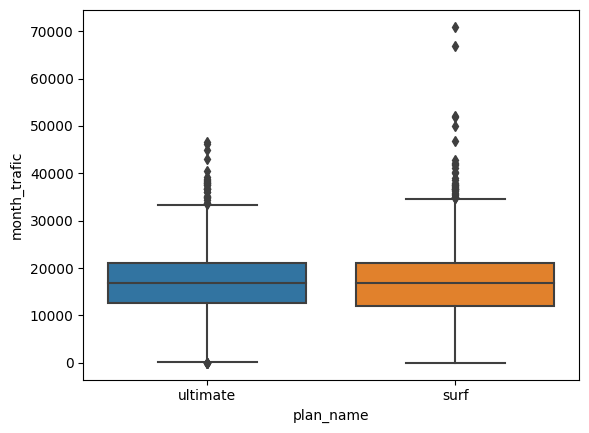

In [534]:
sns.boxplot(data=fusion_tarifas, x='plan_name', y='month_trafic')

Los usuarios de ultimate consumen más datos en promedio que los de surf.

La variabilidad en el consumo de datos es bastante similar en ambos planes, lo que sugiere que los usuarios tienen un comportamiento uniforme en cuanto al uso de datos, independientemente del plan.

## Ingreso

In [535]:
avg_ingresos_mensuales = fusion_tarifas.groupby('plan_name')['ingresos_mensuales'].agg(['mean', 'var'])
print(avg_ingresos_mensuales)

                 mean          var
plan_name                         
surf        36.827418  2634.764343
ultimate   309.577710  6362.197443


<AxesSubplot:xlabel='plan_name', ylabel='ingresos_mensuales'>

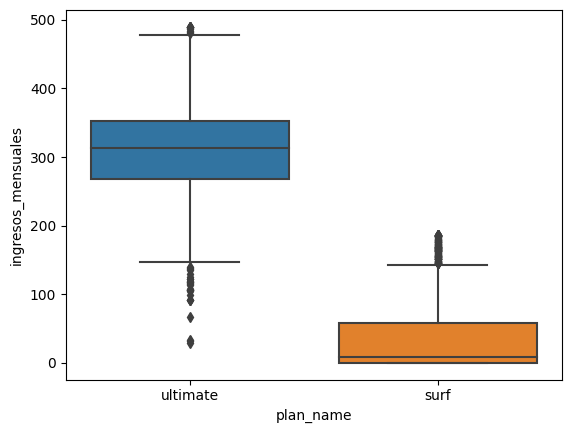

In [536]:
sns.boxplot(data=fusion_tarifas, x='plan_name', y='ingresos_mensuales')

Los ingresos promedio de los usuarios del plan ultimate son considerablemente más altos que los del plan surf, lo cual es lógico considerando que el plan ultimate es un plan más caro.

Aunque los usuarios de ultimate generan más ingresos en promedio, los ingresos en este plan varían más entre los usuarios. Esto podría ser el resultado de algunos usuarios que superan ampliamente los límites del plan o que optan por servicios adicionales, mientras que otros no utilizan tantos recursos.

En resumen, los usuarios de ultimate generan más ingresos de forma promedio, pero los ingresos son más variables, mientras que los usuarios de surf tienen ingresos más consistentes pero más bajos en comparación.

## Prueba las hipótesis estadísticas

Ho = Si Valor p < alpha, entonces surf es mejor que ultimate

H1 = Si Valor p > alpha, entonces ultimate es mejor que surf

In [543]:
# Prueba las hipótesis
# Paso 1 Separar por planes
ingresos_x_surf = fusion_tarifas.query("plan_name == 'surf'")['ingresos_mensuales']
ingresos_x_ultimate = fusion_tarifas.query("plan_name == 'ultimate'")['ingresos_mensuales']
# Paso 2 agregar alpha 5%
alpha = 0.05
#paso 3 Realizar una prueba porque H₁ es que v2.0 < v1.7
results = st.ttest_ind(ingresos_x_surf, ingresos_x_ultimate)
#Paso 4 Imprimir el resultado
print('Valor p: ', results.pvalue)
#Paso 5 comparar Valor P con el umbral
if results.pvalue < alpha:
    print('Rechazamos la Hipotesis Nula')
else:
    print('No podemos rechazar la Hipotesis Nula')

Valor p:  0.0
Rechazamos la Hipotesis Nula


Ho = Si Valor p < alpha, entonces New York-Newark-Jersey City, NY-NJ-PA MSA es mejor que Atlanta-Sandy Springs-Roswell, GA MSA 

H1 = Si Valor p > alpha, entonces Atlanta-Sandy Springs-Roswell, GA MSA es mejor que New York-Newark-Jersey City, NY-NJ-PA MSA

In [541]:
# Prueba las hipótesis
# Paso 1 Separar por planes
ingresos_x_NY = fusion_tarifas.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")['ingresos_mensuales']
ingresos_x_NJ = fusion_tarifas.query("city == 'Atlanta-Sandy Springs-Roswell, GA MSA'")['ingresos_mensuales']
# Paso 2 agregar alpha 5%
alpha = 0.05
#paso 3 Realizar una prueba porque H₁ es que v2.0 < v1.7
results = st.ttest_ind(ingresos_x_NY, ingresos_x_NJ)
#Paso 4 Imprimir el resultado
print('Valor p: ', results.pvalue)
#Paso 5 comparar Valor P con el umbral
if results.pvalue < alpha:
    print('Rechazamos la Hipotesis Nula')
else:
    print('No podemos rechazar la Hipotesis Nula')

Valor p:  1.0285623205870841e-08
Rechazamos la Hipotesis Nula


## Conclusión general

Tras analizar los datos, los usuarios de la tarifa Ultimate tienen un ingreso promedio más alto que los de la tarifa Surf.

En cuanto a la dispersión de los ingresos, los usuarios de Ultimate muestran una mayor variabilidad, lo que indica que algunos usuarios de este plan generan muchos más ingresos que otros, mientras que los usuarios de Surf tienen un comportamiento más uniforme.

Ultimate parece ser una opción más rentable en promedio, pero Surf tiene un comportamiento más consistente, lo que podría indicar que es un plan más estable en cuanto a la generación de ingresos, aunque en menor medida.